<a href="https://colab.research.google.com/github/chloevan/python_visualisation/blob/master/matplotlib/matplotlib_04_area_stacked_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
title: "matplotlib 04 area and stacked plot"
date: 2020-04-22T22:15:47+09:00
tags:
  - "Data Visualisation"
  - "Python"
  - "Area Plot"
  - "Stacked Plot"
  - "Matplotlib"
categories:
  - "Data Visualisation"
  - "Python"
  - "Scatter Plot"
  - "Matplotlib"
menu: 
  python:
    name: matplotlib 04 area and stacked plot
---

## 공지

제 수업을 듣는 사람들이 계속적으로 실습할 수 있도록 강의 파일을 만들었습니다. 늘 도움이 되기를 바라며. 참고했던 교재 및 Reference는 꼭 확인하셔서 교재 구매 또는 관련 Reference를 확인하시기를 바랍니다. 

도움이 되었다면 `Github`에 `Star`를 눌러주세요.
- [python_visualisation](https://github.com/chloevan/python_visualisation)



## I. Matplotlib & Seaborn

### (1) 기본 개요
`Matplotlib`는 파이썬 표준 시각화 도구라고 불리워지며 파이썬 그래프의 기본 토대가 된다고 해도 무방하다. 객체지향 프로그래밍을 지원하므로 세세하게 꾸밀 수 있다. 

`Seaborn` 그래는 파이썬 시각화 도구의 고급 버전이다. `Matplotlib`에 비해 비교적 단순한 인터페이스를 제공하기 때문에 초보자도 어렵지 않게 배울 수 있다. 

### (2) matplotlib & Seabon 설치

설치방법은 윈도우 명령 프롬프트, MacOS, Linux 터미널에서 `pip install matplotlib`입력하면 되지만, 간혹 여러 환경에 따라 달라질 수 있으니 관련 싸이트에서 확인하기를 바란다. 
- matplotlib 설치 방법: https://matplotlib.org/users/installing.html
- seaborn 설치 방법: https://seaborn.pydata.org/installing.html


## II. Area and Stacked Plot

위 그래프를 사용할 때에는 다양한 변수의 소위 누적 효과(`cumulative effect`)를 보여줄 수 있다는 장점이 있다. 

먼저 `Line Graph`를 작성한 후 각각의 변수에 따라 어떤 차이가 있는지 확인한다. 그래프를 작성해보자. 

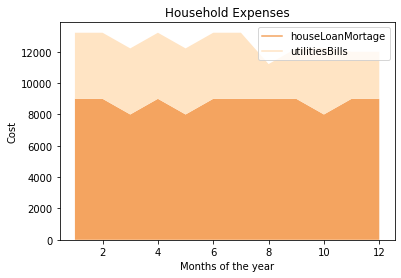

In [0]:
# 데이터 값 생성
houseLoanMortage = [9000, 9000, 8000, 9000, 
                    8000, 9000, 9000, 9000, 
                    9000, 8000, 9000, 9000]
utilitiesBills = [4218, 4218, 4218, 4218, 
                  4218, 4218, 4219, 2218, 
                  3218, 4233, 3000, 3000]

# 시각화를 위한 모듈 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

# 각 변수의 길이에 맞도록 지정 (월이라고 가정해보자)
months = [x for x in range(1, 13)]

# plot 기본 세팅, 색상 지정
plt.plot([], [], color = 'sandybrown', label = 'houseLoanMortage')
plt.plot([], [], color = 'bisque', label = 'utilitiesBills')

# stack 그래프 추가
plt.stackplot(months, houseLoanMortage, utilitiesBills, 
              colors = ['sandybrown', 'bisque'])
plt.legend()

# 라벨 추가
plt.title('Household Expenses')
plt.xlabel('Months of the year')
plt.ylabel('Cost')

plt.show()


소스 코드상으로 어려운 것은 아마 없을 것이다. 다만 해석에 조금 유의할 필요는 있다. 위 그래프는 월별 전체 누적 그래프인데, `houseLoanMortage`와 `utilitiesBills` 사이에 어떤 항목이 지출이 큰 부분인지를 확인할 수 있을 것이다. 

이러한 그래프는 특히 시계열과 그래프를 작성하는 데, 비교군이 존재할 때 매우 유용한 그래프라고 할 수 있다. 




## III. 코로나 시각화 Area Plot 예제
이번에는 이슈가 되고 있는 코로나 데이터를 통해 그래프를 작성해본다. 

In [60]:
import pandas as pd
from tabulate import tabulate

url = 'https://raw.githubusercontent.com/chloevan/datasets/master/covid_19/covid_19.csv'
covid_19 = pd.read_csv(url)
print(tabulate(covid_19.head(), tablefmt="pipe", headers="keys"))

|    | dateRep    |   day |   month |   year |   cases |   deaths | countriesAndTerritories   | geoId   | countryterritoryCode   |   popData2018 |
|---:|:-----------|------:|--------:|-------:|--------:|---------:|:--------------------------|:--------|:-----------------------|--------------:|
|  0 | 2020/04/05 |     5 |       4 |   2020 |      35 |        1 | Afghanistan               | AF      | AFG                    |   3.71724e+07 |
|  1 | 2020/04/04 |     4 |       4 |   2020 |       0 |        0 | Afghanistan               | AF      | AFG                    |   3.71724e+07 |
|  2 | 2020/04/03 |     3 |       4 |   2020 |      43 |        0 | Afghanistan               | AF      | AFG                    |   3.71724e+07 |
|  3 | 2020/04/02 |     2 |       4 |   2020 |      26 |        0 | Afghanistan               | AF      | AFG                    |   3.71724e+07 |
|  4 | 2020/04/01 |     1 |       4 |   2020 |      25 |        0 | Afghanistan               | AF      | AFG         

위 데이터에서 이제, 대표적인 국가만 출력하는 것으로 한다. 그럴려면 국가를 알아야 하기 때문에, 국가만 출력하도록 해보자. `unique()` 함수를 사용해서 구해본다. 

In [0]:
covid_19['countriesAndTerritories'].unique()

array(['Afghanistan', 'Albania', 'Andorra', 'Algeria', 'Angola',
       'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina',
       'Botswana', 'Brazil', 'British_Virgin_Islands',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia', 'Cuba',
       'CuraÃ§ao', 'Cyprus', 'Czech_Republic',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Eritre

여기에서 `South_Korea`, `China`, `Italy`, `United_States_of_America` 이렇게 4개 국가만 날짜별로 어떻게 달라지는지 확인해본다. 

먼저 `isin()`을 활용해서 데이터 전처리를 해서 새로운 데이터를 만든다. 

In [58]:
from tabulate import tabulate

new_data = covid_19[covid_19['countriesAndTerritories'].isin(['South_Korea', 'China', 'Italy', 'United_States_of_America'])].reset_index(drop = True)
temp = new_data.head()
print(tabulate(temp, tablefmt="pipe", headers="keys"))

|    | dateRep    |   day |   month |   year |   cases |   deaths | countriesAndTerritories   | geoId   | countryterritoryCode   |   popData2018 |
|---:|:-----------|------:|--------:|-------:|--------:|---------:|:--------------------------|:--------|:-----------------------|--------------:|
|  0 | 2020/04/05 |     5 |       4 |   2020 |      48 |        3 | China                     | CN      | CHN                    |   1.39273e+09 |
|  1 | 2020/04/04 |     4 |       4 |   2020 |      62 |        4 | China                     | CN      | CHN                    |   1.39273e+09 |
|  2 | 2020/04/03 |     3 |       4 |   2020 |      70 |       10 | China                     | CN      | CHN                    |   1.39273e+09 |
|  3 | 2020/04/02 |     2 |       4 |   2020 |     100 |        6 | China                     | CN      | CHN                    |   1.39273e+09 |
|  4 | 2020/04/01 |     1 |       4 |   2020 |      54 |        1 | China                     | CN      | CHN         

In [59]:
# stack 그래프를 작성하기 위해 데이터를 피벗을 해줘야 한다.  
plotDF = new_data.set_index(['dateRep','countriesAndTerritories'])['cases'].unstack(fill_value=0)
print(tabulate(plotDF.head(), tablefmt="pipe", headers="keys"))

| dateRep    |   China |   Italy |   South_Korea |   United_States_of_America |
|:-----------|--------:|--------:|--------------:|---------------------------:|
| 2019/12/31 |      27 |       0 |             0 |                          0 |
| 2020/01/01 |       0 |       0 |             0 |                          0 |
| 2020/01/02 |       0 |       0 |             0 |                          0 |
| 2020/01/03 |      17 |       0 |             0 |                          0 |
| 2020/01/04 |       0 |       0 |             0 |                          0 |


이렇게 피벗이 완성이 된 이후에 그래프를 작성해본다. 

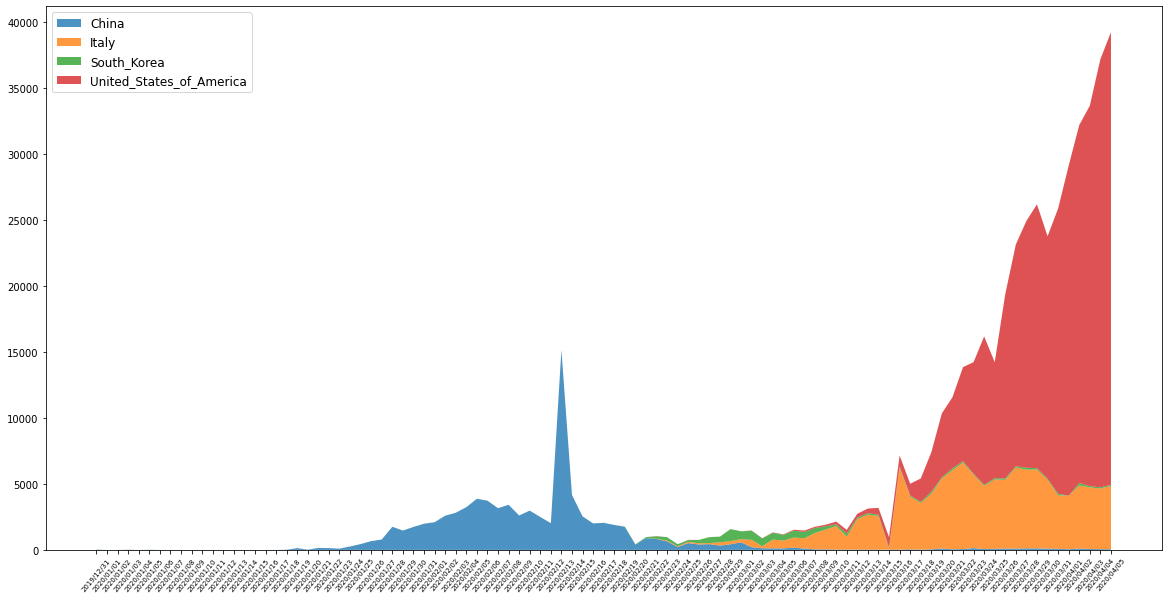

In [0]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=50, size=7)

plt.stackplot(plotDF.index,
              [plotDF['China'], plotDF['Italy'],
               plotDF['South_Korea'], plotDF['United_States_of_America']],
              labels=['China', 'Italy', 'South_Korea', 'United_States_of_America'],
              alpha=0.8)

plt.legend(loc=2, fontsize='large')
plt.show()

 ## IV. 실습파일
- 구글코랩에서 빠르게 실습도 할 수 있습니다. [실습](https://colab.research.google.com/github/chloevan/python_visualisation/blob/master/matplotlib/matplotlib_04_area_stacked_plot.ipynb)

## V. Reference
Mukhiya, Uuresh Kumar. Ahmed Usman. Hands-on Exploratory Data Analysis With Python: Perform EDA Techniques to understand, Summarize, and Investigate Your Data. Packt publishing limited, 2020.